Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

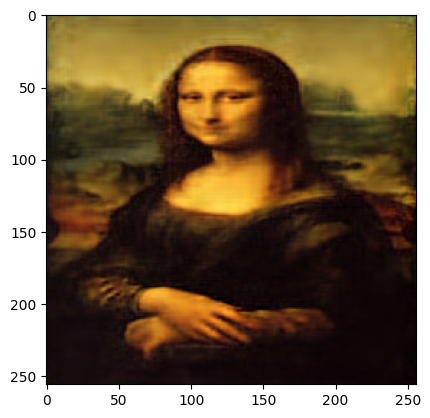

In [2]:
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt

np.random.seed(42)

img_size=256


img_data=[]

img=cv2.imread('Mona_Lisa.jpg', 1)
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_img=cv2.resize(rgb_img, (256,256))
img_data.append(img_to_array(rgb_img))
img_final=np.reshape(img_data, (len(img_data),256, 256, 3))
img_final=img_final.astype('float32')/255


model=Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(16, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

model.summary()

model.fit(img_final, img_final, epochs=2000, shuffle=True)


pred=model.predict(img_final)


plt.imshow(pred[0].reshape(256,256,3))